### Visual of the definition of Overfitting Data

This is copy and pasted from the sci-kit learn documentation website <br/>
(https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)



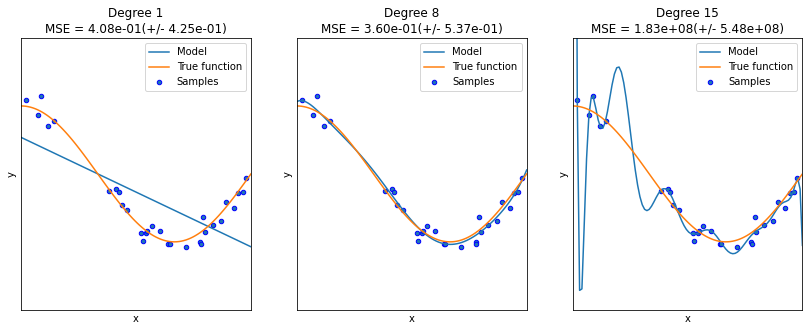

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
"""
This is copy and pasted from the sci-kit learn documentation website
(https://scikit-learn.org/stable/auto_examples/model_selection/plot_underfitting_overfitting.html)
"""

def true_fun(X):
    return np.cos(1.5 * np.pi * X)

np.random.seed(0)

n_samples = 30
degrees = range(1,20,7)

X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, 3, i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = cross_val_score(pipeline, X[:, np.newaxis], y,
                             scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, edgecolor='b', s=20, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

### Lasso and Ridge Techniques

In [2]:
import pandas as pd
import sklearn
from sklearn.datasets import load_boston 

In [3]:
#load in a data set
data = load_boston()

In [4]:
#View description of data
print(data.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [5]:
# Create Dataframe of data
df = pd.DataFrame(data=data.data,columns=data.feature_names)
df['target'] = data.target

#preview data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [6]:
#check to see if there are any null values in data set
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
target     0
dtype: int64

In [7]:
#checking data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  target   506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [8]:
#Split data into target variable (y) and observable variables (x)
y = df.target
x = df.drop(columns='target')

from sklearn.model_selection import train_test_split

#split data into test and train datasets
x_train,x_test,y_train,y_test = train_test_split(x, y, random_state=10)

In [9]:
from sklearn.preprocessing import StandardScaler

# Create Scaler Object
scaled_data = StandardScaler()

# Fit and transform Data to Scaler Object
x_train_scaled = scaled_data.fit_transform(x_train)
x_test_scaled = scaled_data.transform(x_test)


#view the scaled data
print('Original Data')
display(df.head())

# Print separator dashes and view data
print('-'*100)
print('Transformed Data')
pd.DataFrame(x_train_scaled, columns=data.feature_names).head()

Original Data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


----------------------------------------------------------------------------------------------------
Transformed Data


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,-0.231290,-0.482143,1.157222,-0.254179,0.399466,-0.560138,0.371580,-0.637272,-0.552173,-0.074206,-1.785651,-1.312626,-0.120681
1,-0.382326,-0.482143,-0.232693,-0.254179,-0.119485,0.193524,-0.054185,-0.115918,-0.664203,-0.648757,-0.064321,0.436240,-0.371215
2,-0.418341,-0.482143,-1.239233,-0.254179,-0.961717,1.736665,-0.220943,-0.133491,-0.888265,-0.811256,-0.250411,0.453875,-0.958141
3,-0.420424,0.889908,-1.341180,-0.254179,-0.732017,0.890474,0.055804,-0.280720,-0.328111,-1.124648,-0.064321,0.453875,-0.769537
4,4.060100,-0.482143,0.944715,-0.254179,1.148117,-1.076508,0.591558,-1.022892,1.576411,1.452127,0.773082,-0.249846,2.024344


### Creating a Basic Linear Regression

In [10]:
from sklearn.metrics import mean_squared_error, mean_squared_log_error
from sklearn.linear_model import LinearRegression

# Fit the model
linreg = LinearRegression()
linreg.fit(x_train_scaled, y_train)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {linreg.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {linreg.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, linreg.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, linreg.predict(x_test_scaled)): .3f}')

Training r^2: 0.758
Test r^2:  0.675
Training MSE:  18.879
Test MSE:  32.443


### Creating a Lasso Regression with $\alpha$ = 1

In [11]:
from sklearn.linear_model import Lasso

# Lasso is also known as the L1 norm 
# Default alpha value is 1
lasso = Lasso(alpha=1,random_state=1) 
lasso.fit(x_train_scaled, y_train)

# See how many variables were removed
print(f'There are {len(lasso.coef_)} total parameters')
print(f'There have been {sum((abs(lasso.coef_) > 0))} features removed with an alpha value of {lasso.alpha}')
print(f'There are {100 - sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_)*100:.3}% of the original parameters')
print('-'*100)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {lasso.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {lasso.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, lasso.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(x_test_scaled)): .3f}')

There are 13 total parameters
There have been 5 features removed with an alpha value of 1
There are 38.5% of the original parameters
----------------------------------------------------------------------------------------------------
Training r^2: 0.678
Test r^2:  0.611
Training MSE:  25.096
Test MSE:  38.755


### Ridge Regression with $\alpha$ = 1

In [12]:
from sklearn.linear_model import Ridge


# Ridge is also known as the L2 norm
# Alpha default is 1.0
ridge = Ridge(alpha= 1,random_state = 1)
ridge.fit(x_train_scaled, y_train)

print(f'Training r^2: {ridge.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {ridge.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, ridge.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(x_test_scaled)): .3f}')

Training r^2: 0.758
Test r^2:  0.674
Training MSE:  18.881
Test MSE:  32.454


### Finding Optimized Lasso Alpha Value

The optimal alpha value is :0.010642092440647224


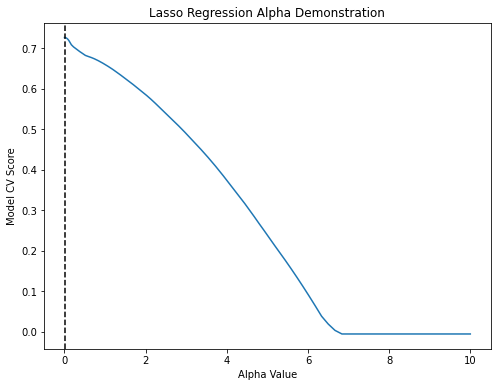

In [13]:
from sklearn.model_selection import GridSearchCV

# Create an array of alpha values to test
# Start np.linspace value is 10**-10 because a value of 0 throws warnings
alphas = np.logspace(-10, 1, 1000,base=10)

# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]

# Specify number of folds for cross_validation
n_folds = 5

# Create grid search instance using desired variables
clf_lasso = GridSearchCV(lasso, tuned_parameters, cv=5, refit=True)
clf_lasso.fit(x_train_scaled, y_train)
lasso_scores = clf_lasso.cv_results_['mean_test_score']

# Plot the results
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, lasso_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Model CV Score')
plt.title('Lasso Regression Alpha Demonstration')
plt.axvline(clf_lasso.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is :{clf_lasso.best_params_["alpha"]}')

### Creating Optimized Lasso Regression

In [14]:
# Set alpha = optimized alpha value
lasso_optimized_alpha = clf_lasso.best_params_['alpha']

# Default alpha value is 1
lasso = Lasso(alpha=lasso_optimized_alpha,random_state=1) 
lasso.fit(x_train_scaled, y_train)

# See how many variables were removed
print(f'There are {len(lasso.coef_)} total parameters')
print(f'There have been {sum((abs(lasso.coef_) > 0))} features removed with an alpha value of {lasso.alpha}')
print(f'There are {100 - sum(abs(lasso.coef_) < 10**(-10))/ len(lasso.coef_)*100:.4}% of the original parameters')
print('-'*100)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {lasso.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {lasso.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, lasso.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(x_test_scaled)): .3f}')

There are 13 total parameters
There have been 13 features removed with an alpha value of 0.010642092440647224
There are 100.0% of the original parameters
----------------------------------------------------------------------------------------------------
Training r^2: 0.757
Test r^2:  0.675
Training MSE:  18.885
Test MSE:  32.440


### Finding Optimized Ridge Alpha Value

The optimal alpha value is: 2.971295818577334


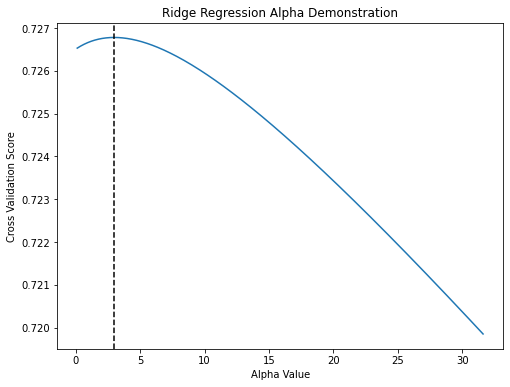

In [15]:
from sklearn.model_selection import Ridge

# Create an array of alpha values to test
alphas = np.logspace(-1, 1.5, 500,base=10)

# Create a Ridge model instance
ridge = Ridge(random_state=0, max_iter=10000,alpha=alphas)


# Create dictionary key,value pair of alpha values
tuned_parameters = [{'alpha': alphas}]

# Specify number of folds for cross_validation
n_folds = 5

# Create grid search instance using desired variables
clf_ridge = GridSearchCV(ridge, tuned_parameters, cv=5, refit=False)
clf_ridge.fit(x_train_scaled, y_train)
ridge_scores = clf_ridge.cv_results_['mean_test_score']

# Plot the Figure
plt.figure().set_size_inches(8, 6)
plt.plot(alphas, ridge_scores)
plt.xlabel('Alpha Value')
plt.ylabel('Cross Validation Score')
plt.title('Ridge Regression Alpha Demonstration')
plt.axvline(clf_ridge.best_params_['alpha'], color='black', linestyle='--')
print(f'The optimal alpha value is: {clf_ridge.best_params_["alpha"]}')

### Creating Optimized Ridge Regression

In [16]:
# Set alpha = optimized alpha value
ridge_optimized_alpha = clf_ridge.best_params_['alpha']

# Default alpha value is 1
ridge = Ridge(alpha=ridge_optimized_alpha,random_state=1) 
ridge.fit(x_train_scaled, y_train)

# Print R2 and MSE for training and test sets round to the nearest .001
print(f'Training r^2: {ridge.score(x_train_scaled, y_train):.3f}')
print(f'Test r^2: {ridge.score(x_test_scaled, y_test): .3f}')
print(f'Training MSE: {mean_squared_error(y_train, ridge.predict(x_train_scaled)): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(x_test_scaled)): .3f}')

Training r^2: 0.757
Test r^2:  0.674
Training MSE:  18.893
Test MSE:  32.482


### Results of Optimized Models vs Simple Regression

In [17]:
# Simple Linear Regression
print('Simple Linear Regression')
print(f'Test r^2: {linreg.score(x_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, linreg.predict(x_test_scaled)): .3f}')
print(f'Number of model features: {linreg.n_features_in_}')
print('*'*100)

# Ridge Regression
print('Ridge Regression')
print(f'Test r^2: {ridge.score(x_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, ridge.predict(x_test_scaled)): .3f}')
print(f'Number of model features: {ridge.n_features_in_}')
print('*'*100)

# Lasso Regression 
print('Lasso Regression')
print(f'Test r^2: {lasso.score(x_test_scaled, y_test): .3f}')
print(f'Test MSE: {mean_squared_error(y_test, lasso.predict(x_test_scaled)): .3f}')
print(f'Number of model features: {lasso.n_features_in_}')
print('*'*100)



Simple Linear Regression
Test r^2:  0.675
Test MSE:  32.443
Number of model features: 13
****************************************************************************************************
Ridge Regression
Test r^2:  0.674
Test MSE:  32.482
Number of model features: 13
****************************************************************************************************
Lasso Regression
Test r^2:  0.675
Test MSE:  32.440
Number of model features: 13
****************************************************************************************************
